# Analyze the occurances and accuracy for each slot
* Preparation: generate test.pred.json using evaluation.py
* Input: test.pred.json and dataset['test'] 
* Output: Occurances and accuracy for each slot, here's an example
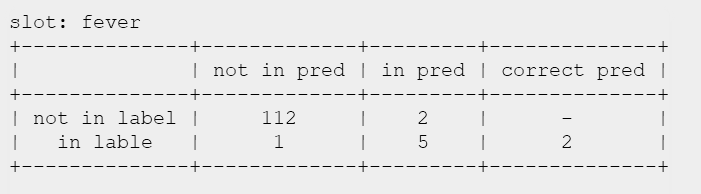

In [ ]:
import json
tst_pred = json.load(open('exp/glad/default/test.pred.json'))

In [ ]:
import dataset
from utils import load_dataset, get_models, load_model
dataset, ontology, vocab, Eword = load_dataset()
dev = dataset['dev']
train = dataset['train']
test = dataset['test']

In [ ]:
# count occurances and accuracy
import numpy as np
slot_accuracy_dev = dict(zip(ontology.slots, [np.array([[0]*3]*2)]*len(ontology.slots)))
for p_diag, v_diag in zip(tst_pred['dialogues'], test.dialogues):
    for p_turn, v_turn in zip(p_diag['turns'], v_diag.turns):
        p_labels = p_turn['pred']
        v_labels = v_turn.turn_label
    
        p_state = {}
        v_state = {}
        for p, v in p_labels:
            p_state[p] = v
        for p, v in v_labels:
            v_state[p] = v

        for slot in ontology.slots:
            if slot not in p_state.keys() and slot not in v_state.keys():
                temp = np.array([[0]*3]*2)
                temp = temp + slot_accuracy_dev.get(slot)
                temp[0][0] += 1
                slot_accuracy_dev[slot] = temp
            elif slot not in v_state.keys() and slot in p_state.keys():
                temp = np.array([[0]*3]*2)
                temp = temp + slot_accuracy_dev.get(slot)
                temp[0][1] += 1
                slot_accuracy_dev[slot] = temp
            elif slot in v_state.keys() and slot not in p_state.keys():
                temp = np.array([[0]*3]*2)
                temp = temp + slot_accuracy_dev.get(slot)
                temp[1][0] += 1
                slot_accuracy_dev[slot] = temp
            elif slot in v_state.keys() and slot in p_state.keys():
                temp = np.array([[0]*3]*2)
                temp = temp + slot_accuracy_dev.get(slot)
                temp[1][1] += 1
                slot_accuracy_dev[slot] = temp
                if v_state[slot]==p_state[slot]:
                    temp = np.array([[0]*3]*2)
                    temp = temp + slot_accuracy_dev.get(slot)
                    temp[1][2] += 1
                    slot_accuracy_dev[slot] = temp
                

In [ ]:
for slot in slot_accuracy_dev:
    slot_accuracy_dev[slot] = slot_accuracy_dev[slot].tolist()
with open('slot_accuracy_dev.json', 'wt') as f:
    json.dump(slot_accuracy_dev, f)

In [ ]:
# output the result
import json
from prettytable import PrettyTable

with open('slot_accuracy_dev.json') as f:
    dev = json.load(f)

for slot, value in dev.items():
    print(f'slot: {slot:10}')
    t = PrettyTable()
    t.field_names = ['', 'not in pred', 'in pred', 'correct pred']
    t.add_row(['not in label', value[0][0], value[0][1], '-'])
    t.add_row(['in lable', value[1][0], value[1][1], value[1][2]])
    print(t)
    print()
